In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb

In [118]:
#Load the dataframe
uberdata=pd.read_csv("Uber Request Data.csv")

In [119]:
#data shape
uberdata.shape

(6745, 6)

In [120]:
#Identify nulls accross columns 
uberdata.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [121]:
#Identify nulls accross rows
uberdata.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
6715    2
6716    2
6717    2
6718    2
6719    2
6720    2
6721    2
6722    2
6723    2
6724    2
6725    2
6726    2
6727    2
6728    2
6729    2
6730    2
6731    2
6732    2
6733    2
6734    2
6735    2
6736    2
6737    2
6738    2
6739    2
6740    2
6741    2
6742    2
6743    2
6744    2
Length: 6745, dtype: int64

In [122]:
#As there are more than 50% of null values
uberdata.drop(['Drop timestamp'],axis=1,inplace=True)

In [123]:
# Formatting the date time 
uberdata['Request timestamp']=pd.to_datetime(uberdata['Request timestamp'])
uberdata["Rtime"]=uberdata['Request timestamp'].dt.strftime('%Y-%m-%d  %H:%M')

In [124]:
#Segregate the time slots 
#0-6 EarlyMorning
#6-12 Morning
#12-16 Afternnon
#16 - 19 Evening
#19 - 21 Night
uberdata["day_parts"]=uberdata['Request timestamp'].apply(lambda x:int(str(x).split(' ')[1].split(':')[0]))
uberdata["day_parts"]=uberdata["day_parts"].apply(lambda x: "EarlyMorning" if 0<x<6 else ("Morning" if 6<=x<12 else ("AfterNoon" if 12<=x<16 else ("Evening" if 16<=x<19 else ("Night" if 19<=x<21 else "LateNight")))))
uberdata

,Request id,Pickup point,Driver id,Status,Request timestamp,Rtime,day_parts
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 11:51,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 17:57,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:17,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 21:08,LateNight
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 08:33,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 21:57,LateNight
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 06:15,Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 05:11,EarlyMorning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 17:57,Evening
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 06:46,Morning


In [126]:
cancelled_nocar_airport

,Request id,Pickup point,Driver id,Status,Request timestamp,Rtime,day_slots
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,2016-07-14 20:51,Night
2835,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,2016-12-07 19:14,Night
2836,3806,Airport,2.0,Cancelled,2016-07-13 20:57:49,2016-07-13 20:57,Night
2838,5023,Airport,2.0,Cancelled,2016-07-14 19:04:08,2016-07-14 19:04,Night
2841,1867,Airport,3.0,Cancelled,2016-12-07 09:59:00,2016-12-07 09:59,Morning
2844,1254,Airport,4.0,Cancelled,2016-11-07 21:53:00,2016-11-07 21:53,LateNight
2845,3807,Airport,4.0,Cancelled,2016-07-13 20:58:00,2016-07-13 20:58,Night
2855,2582,Airport,7.0,Cancelled,2016-12-07 21:42:00,2016-12-07 21:42,LateNight
2868,4667,Airport,10.0,Cancelled,2016-07-14 12:23:07,2016-07-14 12:23,AfterNoon
2874,3822,Airport,14.0,Cancelled,2016-07-13 21:10:52,2016-07-13 21:10,LateNight


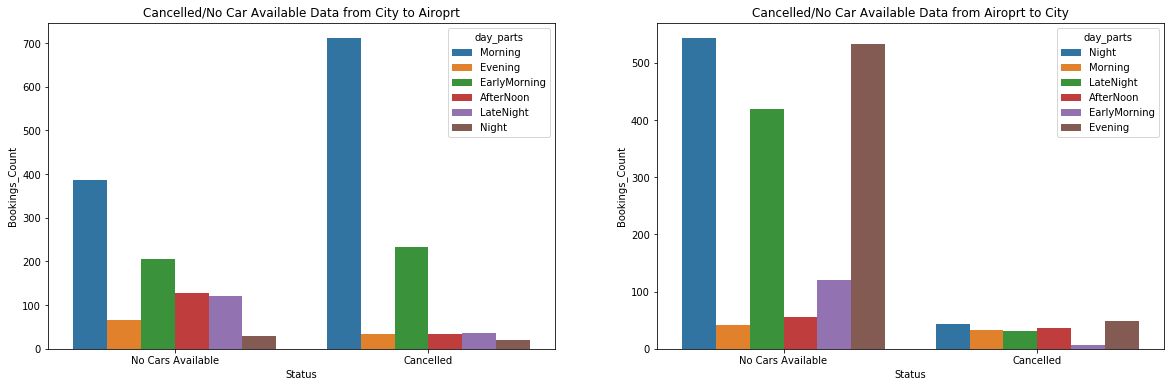

In [145]:
#Filtering based on Cancelled and No Cars Available.
cancelled = uberdata.loc[(uberdata['Status'] == 'Cancelled') | (uberdata['Status'] == 'No Cars Available')]
plt.figure(figsize=(20, 6))
#pickup point from City
cancelled_nocar_available_city = cancelled.loc[cancelled['Pickup point']=='City']
#plot 1.
plt.subplot(1, 2, 1)
#Plot the graph 1 
plot_data = sb.countplot(x="Status", data=cancelled_nocar_available_city, order=['No Cars Available','Cancelled'],hue='day_parts')
plt.xlabel('Status')
plt.ylabel('Bookings_Count')
plt.title('Cancelled/No Car Available Data from City to Airoprt')
#pickup point from Airport
cancelled_nocar_airport = cancelled.loc[cancelled_nocar['Pickup point']=='Airport']

#plot 2
plt.subplot(1, 2, 2)
plot_data = sb.countplot(x="Status", data=cancelled_nocar_airport, order=['No Cars Available','Cancelled'],hue='day_parts')
plt.xlabel('Status')
plt.ylabel('Bookings_Count')
plt.title('Cancelled/No Car Available Data from Airoprt to City')
plt.show()

In [130]:
# getting counts for each time slot
alldata=uberdata.pivot_table(index=["Status","Pickup point","day_parts"],aggfunc="count")
alldata.reset_index(inplace=True)
alldata

,Status,Pickup point,day_parts,Driver id,Request id,Request timestamp,Rtime
0,Cancelled,Airport,AfterNoon,36,36,36,36
1,Cancelled,Airport,EarlyMorning,6,6,6,6
2,Cancelled,Airport,Evening,48,48,48,48
3,Cancelled,Airport,LateNight,31,31,31,31
4,Cancelled,Airport,Morning,33,33,33,33
5,Cancelled,Airport,Night,44,44,44,44
6,Cancelled,City,AfterNoon,33,33,33,33
7,Cancelled,City,EarlyMorning,232,232,232,232
8,Cancelled,City,Evening,33,33,33,33
9,Cancelled,City,LateNight,36,36,36,36


In [131]:
#getting total sum of requests from Airport to city and City to airport
demand=alldata.pivot_table(index=["Pickup point","day_parts"],aggfunc="sum")
print(list(demand["Request timestamp"]))
demand.reset_index(inplace=True)
demand["type"]="demand"
demand

[278, 292, 774, 677, 473, 744, 373, 632, 313, 369, 1599, 221]


,Pickup point,day_parts,Driver id,Request id,Request timestamp,Rtime,type
0,Airport,AfterNoon,223,278,278,278,demand
1,Airport,EarlyMorning,171,292,292,292,demand
2,Airport,Evening,241,774,774,774,demand
3,Airport,LateNight,257,677,677,677,demand
4,Airport,Morning,432,473,473,473,demand
5,Airport,Night,201,744,744,744,demand
6,City,AfterNoon,246,373,373,373,demand
7,City,EarlyMorning,426,632,632,632,demand
8,City,Evening,246,313,313,313,demand
9,City,LateNight,249,369,369,369,demand


In [132]:
#getting completed sum of requests from Airport to city and City to airport
supply=alldata.loc[alldata.Status=="Trip Completed"].pivot_table(index=["Pickup point","day_parts"],aggfunc="sum")
print(list(supply["Request timestamp"]))
supply.reset_index(inplace=True)
supply["type"]="supply"
supply

[187, 165, 193, 226, 399, 157, 213, 194, 213, 213, 501, 170]


,Pickup point,day_parts,Driver id,Request id,Request timestamp,Rtime,type
0,Airport,AfterNoon,187,187,187,187,supply
1,Airport,EarlyMorning,165,165,165,165,supply
2,Airport,Evening,193,193,193,193,supply
3,Airport,LateNight,226,226,226,226,supply
4,Airport,Morning,399,399,399,399,supply
5,Airport,Night,157,157,157,157,supply
6,City,AfterNoon,213,213,213,213,supply
7,City,EarlyMorning,194,194,194,194,supply
8,City,Evening,213,213,213,213,supply
9,City,LateNight,213,213,213,213,supply


In [143]:
#append demand and supply to single frame
details_supply_demand=supply.append(demand,sort=False)
details_supply_demand

,Pickup point,day_parts,Driver id,Request id,Request timestamp,Rtime,type
0,Airport,AfterNoon,187,187,187,187,supply
1,Airport,EarlyMorning,165,165,165,165,supply
2,Airport,Evening,193,193,193,193,supply
3,Airport,LateNight,226,226,226,226,supply
4,Airport,Morning,399,399,399,399,supply
5,Airport,Night,157,157,157,157,supply
6,City,AfterNoon,213,213,213,213,supply
7,City,EarlyMorning,194,194,194,194,supply
8,City,Evening,213,213,213,213,supply
9,City,LateNight,213,213,213,213,supply


Text(0,0.5,'Count')

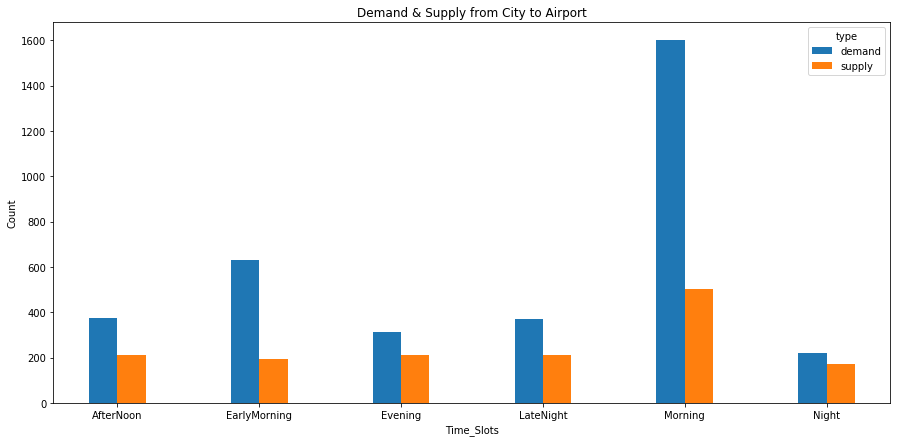

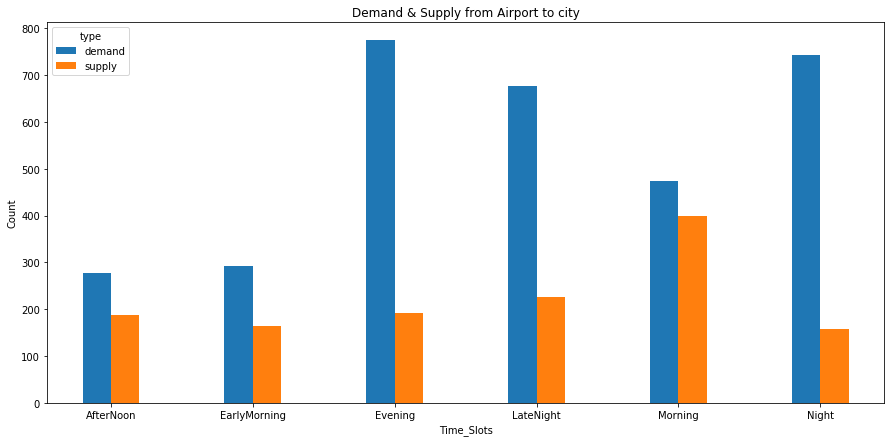

In [142]:
#Plot city to airpot and airport to city graphs
dt=details_supply_demand.loc[(details_supply_demand["Pickup point"]=="City")].pivot(index="day_parts",columns="type",values="Request timestamp")
dt.plot(kind="bar",title="Demand & Supply from City to Airport",rot=0,width=0.4,figsize=(15,7))
pt.xlabel("Time_Slots")
pt.ylabel("Count")
dt1=details_supply_demand.loc[(details_supply_demand["Pickup point"]=="Airport")].pivot(index="day_parts",columns="type",values="Request timestamp")
dt1.plot(kind="bar",title="Demand & Supply from Airport to city",rot=0,width=0.4,figsize=(15,7))
pt.xlabel("Time_Slots")
pt.ylabel("Count")